In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('dementia_dataset.csv')

In [4]:
print(df.columns)

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [5]:
df = df.sort_values('Visit').drop_duplicates('Subject ID')

In [6]:
le = LabelEncoder()
df['M/F'] = le.fit_transform(df['M/F'])

In [7]:
df['Group'] = df['Group'].replace({'Nondemented': 0, 'Demented': 1, 'Converted': 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_7720\159057651.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Group'] = df['Group'].replace({'Nondemented': 0, 'Demented': 1, 'Converted': 1})


In [8]:
features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F']
X = df[features]
y = df['Group']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

In [12]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [13]:
print("Best parameters found:", grid.best_params_)
best_model = grid.best_estimator_

Best parameters found: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}


In [14]:
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.71      0.83        14

    accuracy                           0.86        29
   macro avg       0.89      0.86      0.86        29
weighted avg       0.89      0.86      0.86        29

Accuracy: 0.8620689655172413


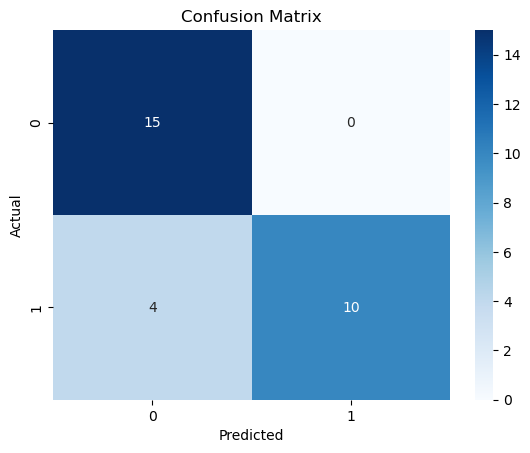

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
joblib.dump(best_model, 'svm_dementia_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved to disk.")

Model and scaler saved to disk.
